<a href="https://colab.research.google.com/github/cincysam6/HelloWorld/blob/master/KFL_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("openxlsx")
library(openxlsx)

install.packages("nflreadr")
install.packages("nflfastR")
install.packages("ggthemes")

library(ggthemes)
library(nflreadr)
library(nflfastR)
library(dplyr)
library(tidyverse)
library(ggplot2)


# install packages if you haven't already
install.packages("ggbeeswarm")
install.packages("lubridate")
library(lubridate)
 
# load libraries
library("ggbeeswarm")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’, ‘snakecase’, ‘fastrmodels’, ‘furrr’, ‘future’, ‘janitor’, ‘progressr’, ‘xgboost’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘nflfastR’


The following objects are masked from ‘package:nflreadr’:

    load_pbp, load_player_stats



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0 

In [ ]:
teams <- load_teams()
depth_charts <- load_depth_charts(seasons=2021)
current_ff_rankings<-load_ff_rankings()
participation_data<-load_participation(seasons=2021)
injuries<-load_injuries(seasons=2021)
pfr_adv_stats<-load_pfr_advstats(seasons=2021)
rosters<-load_rosters(seasons=c(2010:2021))
players<-load_players()
weekly_stats<-load_player_stats(seasons=c(2010:2021))
schedules_2021_pres <-load_schedules(2021:2022)
ngs_data<-load_nextgen_stats(seasons=2021)



In [ ]:
str(rosters%>%arrange(desc(season)))
str(weekly_stats%>%arrange(desc(season)))

nflverse_data [27,422 × 36] (S3: nflverse_data/tbl_df/tbl/data.table/data.frame)
 $ season                 : int [1:27422] 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ team                   : chr [1:27422] "ARI" "ARI" "ARI" "ARI" ...
 $ position               : chr [1:27422] "DB" "DB" "DB" "DB" ...
 $ depth_chart_position   : chr [1:27422] "FS" "CB" "CB" "CB" ...
 $ jersey_number          : chr [1:27422] "31" "23" "21" "21" ...
 $ status                 : chr [1:27422] "Active" "R/Injured" "PS/Vet Pro" "R/Retired" ...
 $ full_name              : chr [1:27422] "Chris Banjo" "Robert Alford" "Bashaud Breeland" "Malcolm Butler" ...
 $ first_name             : chr [1:27422] "Ayorunmi" "Robert" "Bashaud" "Malcolm" ...
 $ last_name              : chr [1:27422] "Banjo" "Alford" "Breeland" "Butler" ...
 $ birth_date             : Date[1:27422], format: "1990-02-26" "1988-11-01" ...
 $ height                 : chr [1:27422] "5-10" "5-10" "5-11" "5-11" ...
 $ weight                 :

In [ ]:
player_stats <-weekly_stats%>%inner_join(rosters,by=c("player_id"="gsis_id","season"="season"))%>%distinct()


depth_chart_position
<chr>
QB
QB
QB
QB
QB
QB
QB
QB
QB


In [ ]:


fantasy_eligible_players<-player_stats%>%
filter(position=="RB"|position=="QB"|position=="WR"|position=="TE")%>%
select(player_id,
player_name,
recent_team,
season,
week.x,
position,
season_type,
completions,
attempts,
passing_yards,
passing_tds,
interceptions,
rushing_yards,
rushing_tds,
receiving_yards,
receiving_tds,
receiving_fumbles_lost,
rushing_fumbles_lost,
targets,
receptions,
receiving_air_yards,
target_share,
air_yards_share,
sacks,
passing_epa,
carries,
rushing_epa,
receiving_epa
)

fantasy_eligible_players%>%arrange(desc(season))%>%head()

player_id,player_name,recent_team,season,week.x,position,season_type,completions,attempts,passing_yards,⋯,targets,receptions,receiving_air_yards,target_share,air_yards_share,sacks,passing_epa,carries,rushing_epa,receiving_epa
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
00-0019596,T.Brady,TB,2021,1,QB,REG,32,50,379,⋯,0,0,0,NA,NA,0,14.006987,0,NA,NA
00-0019596,T.Brady,TB,2021,2,QB,REG,24,36,276,⋯,0,0,0,NA,NA,3,1.854364,1,1.2840404,NA
00-0019596,T.Brady,TB,2021,3,QB,REG,41,55,432,⋯,0,0,0,NA,NA,3,13.163303,3,0.5629274,NA
00-0019596,T.Brady,TB,2021,4,QB,REG,22,43,269,⋯,0,0,0,NA,NA,1,2.245208,4,1.6620587,NA
00-0019596,T.Brady,TB,2021,5,QB,REG,30,41,411,⋯,0,0,0,NA,NA,2,28.323594,1,0.8653909,NA
00-0019596,T.Brady,TB,2021,6,QB,REG,34,42,297,⋯,0,0,0,NA,NA,0,13.495770,4,-3.6897322,NA


In [ ]:
fantasy_eligible_players<-fantasy_eligible_players%>%mutate(kfl_fantasy_pts = (passing_tds*6)+(rushing_tds*6)+(receiving_tds*6)+(floor(passing_yards/25))+(floor(rushing_yards/10))+(floor(receiving_yards/10))-(interceptions*2)-(receiving_fumbles_lost*2)-(rushing_fumbles_lost*2))

In [ ]:
season_fantasy_points<-fantasy_eligible_players%>%filter(season_type=="REG")%>%group_by(player_id,season)%>%mutate(kfl_season_pts = sum(kfl_fantasy_pts))%>%select(player_id,player_name,season,position,kfl_season_pts)%>%distinct()

In [ ]:
str(fantasy_eligible_players)

nflverse_data [59,693 × 29] (S3: nflverse_data/tbl_df/tbl/data.table/data.frame)
 $ player_id             : chr [1:59693] "00-0000865" "00-0000865" "00-0000865" "00-0001545" ...
 $ player_name           : chr [1:59693] "C.Batch" "C.Batch" "C.Batch" "T.Bouman" ...
 $ recent_team           : chr [1:59693] "PIT" "PIT" "PIT" "JAX" ...
 $ season                : int [1:59693] 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ week.x                : int [1:59693] 2 3 4 7 4 17 2 6 7 8 ...
 $ position              : chr [1:59693] "QB" "QB" "QB" "QB" ...
 $ season_type           : chr [1:59693] "REG" "REG" "REG" "REG" ...
 $ completions           : int [1:59693] 5 12 12 18 1 6 17 11 17 8 ...
 $ attempts              : int [1:59693] 11 17 21 34 1 12 25 16 31 15 ...
 $ passing_yards         : num [1:59693] 25 186 141 222 7 110 149 110 276 52 ...
 $ passing_tds           : int [1:59693] 0 3 0 2 0 2 1 1 3 0 ...
 $ interceptions         : num [1:59693] 0 2 1 2 0 1 1 0 2 0 ...
 $ rushing_yards

In [ ]:
last_seas_fp<-fantasy_eligible_players%>%
select(player_id,recent_team,season,position,season_type,completions,attempts,passing_yards,rushing_yards,receiving_yards,passing_tds,rushing_tds,receiving_tds,targets,receptions,carries,receiving_air_yards,kfl_fantasy_pts)%>%
filter(season == 2021  & season_type == "REG")%>%
group_by(player_id,recent_team,season,position,season_type)%>%
mutate(total_fantasy_pts = sum(kfl_fantasy_pts),
fp_from_td_pct = (((rush_td + passing_tds + rec_td)*6)/total_fantasy_pts)
games = n(),
pts_per_game = sum(kfl_fantasy_pts)/n(),
min_pts = min(kfl_fantasy_pts),
max_pts = max(kfl_fantasy_pts),
sd_pts = sd(kfl_fantasy_pts),
comp = sum(completions),
att = sum(attempts),
att_pg = att/games,
ps_yd = sum(passing_yards),
rush_yd = sum(rushing_yards),
rec_yd = sum(receiving_yards),
yds_pg = (ps_yd + rush_yd + rec_yd)/games
ps_td = sum(passing_tds),
rush_td = sum(rushing_tds),
rec_td = sum(receiving_tds),
targ = sum(targets),
targ_pg = targ/games,
rec = sum(receptions),
car = sum(carries),
usage = car + targ, 
air_yds = sum(receiving_air_yards)
)%>%select(-kfl_fantasy_pts,-completions,-attempts,-passing_yards,-rushing_yards,-receiving_yards,-passing_tds,-rushing_tds,-receiving_tds,-targets,-receptions,-carries,-receiving_air_yards)%>%distinct()

last_seas_fp%>%head()

player_id,recent_team,season,position,season_type,total_fantasy_pts,games,pts_per_game,min_pts,max_pts,⋯,ps_yd,rush_yd,rec_yd,ps_td,rush_td,rec_td,targ,rec,car,air_yds
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
00-0019596,TB,2021,QB,REG,454,17,26.705882,4,47,⋯,5316,81,0,43,2,0,0,0,28,0
00-0022924,PIT,2021,QB,REG,254,16,15.875000,7,28,⋯,3740,5,0,22,1,0,0,0,20,0
00-0023459,GB,2021,QB,REG,391,16,24.437500,1,41,⋯,4115,101,-4,37,3,0,1,1,33,-4
00-0023682,WAS,2021,QB,REG,0,1,0.000000,0,0,⋯,13,2,0,0,0,0,0,0,1,0
00-0024243,GB,2021,TE,REG,17,13,1.307692,-1,5,⋯,0,0,214,0,0,0,28,23,0,103
00-0025394,TEN,2021,RB,REG,13,3,4.333333,1,8,⋯,0,82,8,0,1,0,4,4,27,-6


In [ ]:
str(NFL_weekly_player_stats)

nflverse_data [62,478 × 84] (S3: nflverse_data/tbl_df/tbl/data.table/data.frame)
 $ player_id                  : chr [1:62478] "00-0000865" "00-0000865" "00-0000865" "00-0001545" ...
 $ player_name                : chr [1:62478] "C.Batch" "C.Batch" "C.Batch" "T.Bouman" ...
 $ recent_team                : chr [1:62478] "PIT" "PIT" "PIT" "JAX" ...
 $ season                     : int [1:62478] 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ week.x                     : int [1:62478] 2 3 4 7 4 17 3 2 6 7 ...
 $ season_type                : chr [1:62478] "REG" "REG" "REG" "REG" ...
 $ completions                : int [1:62478] 5 12 12 18 1 6 0 17 11 17 ...
 $ attempts                   : int [1:62478] 11 17 21 34 1 12 0 25 16 31 ...
 $ passing_yards              : num [1:62478] 25 186 141 222 7 110 0 149 110 276 ...
 $ passing_tds                : int [1:62478] 0 3 0 2 0 2 0 1 1 3 ...
 $ interceptions              : num [1:62478] 0 2 1 2 0 1 0 1 0 2 ...
 $ sacks                    

In [ ]:
NFL_weekly_player_stats<-player_stats%>%mutate(season_week_id = paste0(season,"_",week.x))
NFL_weekly_player_stats<-NFL_weekly_player_stats%>%mutate(kfl_fantasy_pts = (passing_tds*6)+(rushing_tds*6)+(receiving_tds*6)+(floor(passing_yards/25))+(floor(rushing_yards/10))+(floor(receiving_yards/10))-(interceptions*2)-(receiving_fumbles_lost*2)-(rushing_fumbles_lost*2))

NFL_weekly_ranks_by_position<-NFL_weekly_player_stats%>%
select(season_week_id,season,week.x,season_type,position,player_name,player_id,kfl_fantasy_pts)%>%
group_by(season_week_id,position)%>%
mutate(wk_pos_rank = rank(-kfl_fantasy_pts))


NFL_weekly_player_stats<-NFL_weekly_player_stats%>%
inner_join(NFL_weekly_ranks_by_position,by=c('season_week_id'='season_week_id','player_id'='player_id','player_name'='player_name'))%>%
select(-season.y,-season_type.y,-position.y,-kfl_fantasy_pts.y)%>%
rename(kfl_fantasy_pts = kfl_fantasy_pts.x,
      season = season.x,
      week = week.y,
      position = position.x,
      season_type = season_type.x)%>%filter(position %in% off_pos)

NFL_weekly_ranks_by_position%>%arrange(season_week_id,position,wk_pos_rank)%>%filter(season_week_id == "2021_1")%>%head(50)




season_week_id,season,week.x,season_type,position,player_name,player_id,kfl_fantasy_pts,wk_pos_rank
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2021_1,2021,1,REG,DB,M.Farley,00-0032496,0,1.5
2021_1,2021,1,REG,DB,A.Hooker,00-0035632,0,1.5
2021_1,2021,1,REG,LB,U.Gilbert,00-0035223,0,1.0
2021_1,2021,1,REG,OL,M.Remmers,00-0029164,-1,1.0
2021_1,2021,1,REG,QB,K.Murray,00-0035228,41,1.0
2021_1,2021,1,REG,QB,J.Winston,00-0031503,38,2.5
2021_1,2021,1,REG,QB,P.Mahomes,00-0033873,38,2.5
2021_1,2021,1,REG,QB,T.Brady,00-0019596,35,4.0
2021_1,2021,1,REG,QB,R.Wilson,00-0029263,34,5.5


# Current ADP by Position and Overall

In [ ]:
str(WR_rankings)


str(last_seas_fp)

nflverse_data [285 × 10] (S3: nflverse_data/tbl_df/tbl/data.table/data.frame)
 $ player          : chr [1:285] "Justin Jefferson" "Cooper Kupp" "Ja'Marr Chase" "Stefon Diggs" ...
 $ gsis_id         : chr [1:285] "00-0036322" "00-0033908" "00-0036900" "00-0031588" ...
 $ pos             : chr [1:285] "WR" "WR" "WR" "WR" ...
 $ team.x          : chr [1:285] "MIN" "LAR" "CIN" "BUF" ...
 $ ecr             : num [1:285] 1.69 1.78 3.45 4.28 4.54 ...
 $ sd              : num [1:285] 0.71 1.1 1.39 1.22 1.11 1.15 2.85 3.18 2.66 2.82 ...
 $ best            : num [1:285] 1 1 1 2 2 4 5 4 6 5 ...
 $ worst           : num [1:285] 4 9 11 8 7 10 19 20 18 19 ...
 $ player_owned_avg: num [1:285] 99.9 100 99.9 99.9 99.9 99.9 99.7 99.9 99.8 99.9 ...
 $ bye             : num [1:285] 7 7 10 7 6 9 11 11 8 9 ...
 - attr(*, "nflverse_type")= chr "FP expert rankings"
 - attr(*, "nflverse_timestamp")= POSIXct[1:1], format: "2022-08-18 00:56:53"
grouped_df [629 × 23] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ play

In [ ]:
off_pos <- c("RB","WR","QB","TE")

WR_rankings<-current_ff_rankings%>%filter(ecr_type == 'rp' & pos == "WR")%>%left_join(rosters, by=c("sportsdata_id" = "sportradar_id"))%>%select(player,gsis_id,pos,team.x,ecr,sd,best,worst,player_owned_avg,bye)%>%arrange(ecr)%>%distinct()
TE_rankings<-current_ff_rankings%>%filter(ecr_type == 'rp' & pos == "RB")%>%left_join(rosters, by=c("sportsdata_id" = "sportradar_id"))%>%select(player,gsis_id,pos,team.x,ecr,sd,best,worst,player_owned_avg,bye)%>%arrange(ecr)%>%distinct()
QB_rankings<-current_ff_rankings%>%filter(ecr_type == 'rp' & pos == "TE")%>%left_join(rosters, by=c("sportsdata_id" = "sportradar_id"))%>%select(player,gsis_id,pos,team.x,ecr,sd,best,worst,player_owned_avg,bye)%>%arrange(ecr)%>%distinct()
RB_rankings<-current_ff_rankings%>%filter(ecr_type == 'rp' & pos == "QB")%>%left_join(rosters, by=c("sportsdata_id" = "sportradar_id"))%>%select(player,gsis_id,pos,team.x,ecr,sd,best,worst,player_owned_avg,bye)%>%arrange(ecr)%>%distinct()
DEF_rankings<-current_ff_rankings%>%filter(ecr_type == 'rp' & pos == "DST")%>%left_join(rosters, by=c("sportsdata_id" = "sportradar_id"))%>%select(player,gsis_id,team.x,ecr,sd,best,worst,player_owned_avg,bye)%>%arrange(ecr)%>%distinct()
TOT_rankings<-current_ff_rankings%>%filter(ecr_type == 'ro' & pos %in% off_pos)%>%left_join(rosters, by=c("sportsdata_id" = "sportradar_id"))%>%select(player,gsis_id,team.x,ecr,sd,best,worst,player_owned_avg,bye)%>%arrange(ecr)%>%distinct()

WR_rankings<-WR_rankings%>%left_join(last_seas_fp,by=c("gsis_id"="player_id"))%>%mutate(yr_pos_rank_prior = rank(-total_fantasy_pts))
RB_rankings<-RB_rankings%>%left_join(last_seas_fp,by=c("gsis_id"="player_id"))%>%mutate(yr_pos_rank_prior = rank(-total_fantasy_pts))
TE_rankings<-TE_rankings%>%left_join(last_seas_fp,by=c("gsis_id"="player_id"))%>%mutate(yr_pos_rank_prior = rank(-total_fantasy_pts))
QB_rankings<-QB_rankings%>%left_join(last_seas_fp,by=c("gsis_id"="player_id"))%>%mutate(yr_pos_rank_prior = rank(-total_fantasy_pts))
TOT_rankings_alt<-TOT_rankings%>%left_join(last_seas_fp,by=c("gsis_id"="player_id"))%>%mutate(yr_pos_rank_prior = rank(-total_fantasy_pts))

#WR_rankings%>%head(50)
#TE_rankings%>%head(25)
#RB_rankings%>%head(50)
#QB_rankings%>%head(25)
#DEF_rankings%>%head(15)
TOT_rankings_alt%>%head(50)

player,gsis_id,team.x,ecr,sd,best,worst,player_owned_avg,bye,recent_team,⋯,rush_yd,rec_yd,ps_td,rush_td,rec_td,targ,rec,car,air_yds,yr_pos_rank_prior
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
Christian McCaffrey,00-0033280,CAR,1.89,1.42,1,12,99.9,13,CAR,⋯,442,343,0,1,1,41,37,99,91,129.5
Jonathan Taylor,00-0036223,IND,1.97,1.62,1,15,100.0,14,IND,⋯,1811,360,0,18,2,51,40,332,-45,12.0
Austin Ekeler,00-0033699,LAC,3.87,2.29,2,16,99.9,8,LAC,⋯,911,647,0,12,8,94,70,206,171,21.0
Dalvin Cook,00-0033893,MIN,6.31,3.99,1,25,99.9,7,MIN,⋯,1159,224,0,6,0,49,34,249,-79,53.5
Najee Harris,00-0036893,PIT,7.46,5.14,1,25,99.9,9,PIT,⋯,1200,467,0,7,3,94,74,307,-13,30.0
Justin Jefferson,00-0036322,MIN,8.01,2.32,3,13,99.9,7,MIN,⋯,14,1616,0,0,10,167,108,6,2071,31.5
Cooper Kupp,00-0033908,LAR,8.08,2.92,2,23,100.0,7,LA,⋯,18,1947,0,0,16,191,145,4,1641,16.0
Derrick Henry,00-0032764,TEN,8.45,5.34,2,27,99.9,6,TEN,⋯,937,154,1,10,0,20,18,219,-3,47.5
Travis Kelce,00-0030506,KC,10.32,3.23,7,19,99.9,8,KC,⋯,3,1125,0,1,9,134,92,2,994,53.5


In [ ]:

xl_lst <- list('WR' = WR_rankings, 'RB' = RB_rankings,'TE' = TE_rankings, 'QB' = QB_rankings,'DST' = DEF_rankings, 'TOT' = TOT_rankings_alt, 'Depth' = team_depth_chart)

write.xlsx(xl_lst, file = "KFL_2022_rankings.xlsx")



In [ ]:
TOT_rankings%>%filter(player == "Drake London")

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


player,gsis_id,team.x,ecr,sd,best,worst,player_owned_avg,bye,recent_team,⋯,rush_yd,rec_yd,ps_td,rush_td,rec_td,targ,rec,car,air_yds,yr_pos_rank_prior
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>


# A Look of Depth Charts By Team

In [ ]:
#@title Team Name
team_depth_chart<-TOT_rankings%>%filter(ecr < 300)%>%arrange(team.x,ecr)
team_depth_chart<-team_depth_chart%>%left_join(last_seas_fp,by=c("gsis_id"="player_id"))%>%mutate(yr_pos_rank_prior = rank(-total_fantasy_pts))
team_depth_chart%>%head(50)

player,gsis_id,team.x,ecr,sd,best,worst,player_owned_avg,bye,recent_team,⋯,rush_yd,rec_yd,ps_td,rush_td,rec_td,targ,rec,car,air_yds,yr_pos_rank_prior
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
James Conner,00-0033553,ARI,32.64,9.63,16,62,98.5,13,ARI,⋯,752,375,0,15,3,39,37,202,11,29.5
Marquise Brown,00-0035662,ARI,55.65,14.81,24,109,93.0,13,BAL,⋯,5,1008,0,0,6,146,91,1,1622,77.0
Kyler Murray,00-0035228,ARI,66.12,11.81,40,91,97.4,13,ARI,⋯,423,0,24,5,0,0,0,88,0,10.0
Zach Ertz,00-0030061,ARI,94.43,12.93,67,135,91.0,13,PHI,⋯,0,189,0,0,2,31,18,0,249,213.0
Zach Ertz,00-0030061,ARI,94.43,12.93,67,135,91.0,13,ARI,⋯,4,574,0,0,3,81,56,1,595,145.5
DeAndre Hopkins,00-0030564,ARI,101.72,17.90,61,194,86.3,13,ARI,⋯,0,572,0,0,8,64,42,0,788,102.0
Rondale Moore,00-0036936,ARI,142.25,23.24,103,212,29.9,13,ARI,⋯,76,435,0,0,1,64,54,18,92,181.0
Darrel Williams,00-0034301,ARI,165.66,44.57,92,353,12.9,13,KC,⋯,558,452,0,6,2,57,47,144,82,69.0
A.J. Green,00-0027942,ARI,221.86,28.03,130,301,6.7,13,ARI,⋯,0,848,0,0,3,92,54,0,1109,108.5


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'yr_pos_rank' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(p

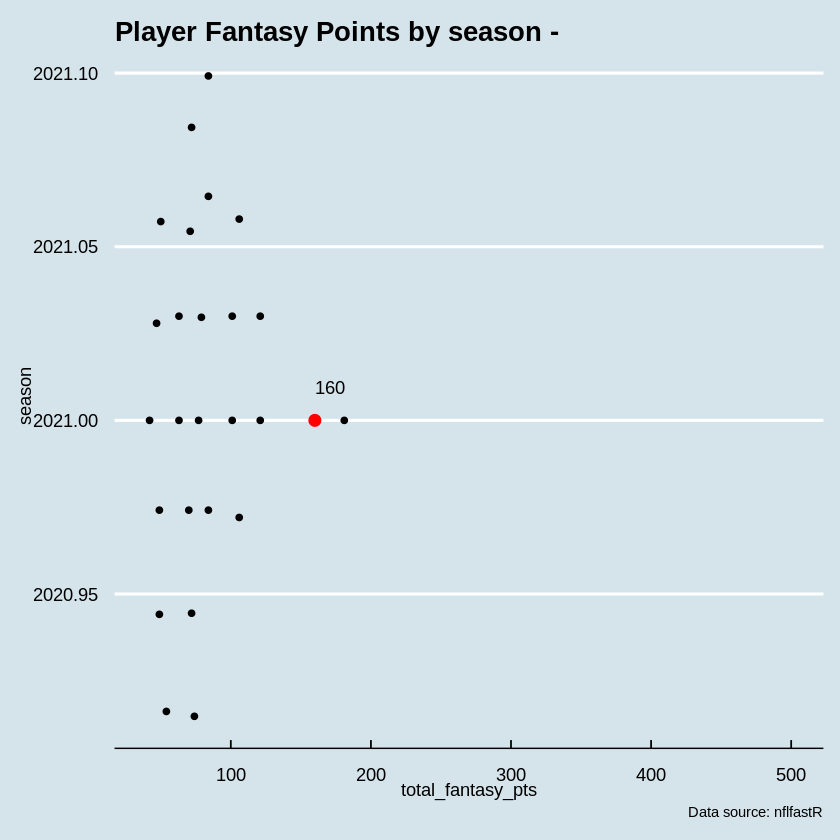

In [ ]:
p_name<-"Travis Kelce"

options(warn = -1)
TE_plyer_stats<-TOT_rankings_alt%>%filter(player==p_name)
season_list<-as.integer(unique(TE_plyer_stats$season))
position_list<-unique(TE_plyer_stats$position)

TE_bee_graph<-TOT_rankings_alt%>%filter(season %in% season_list & position %in% position_list)

ggplot(TE_bee_graph,aes(x=season,y=yr_pos_rank)) + coord_flip() + ylim(0,50) + geom_beeswarm(cex = 3) +geom_point(data=TE_plyer_stats, 
             aes(x=season,y=yr_pos_rank), 
             color='red',
             size=3) + geom_text(data=TE_plyer_stats,aes(x=season,y=yr_pos_rank,label=yr_pos_rank),hjust=0,vjust=-2) + labs(title = paste0("Player rankings by season - ",TE_plyer_stats$player_name),
              caption = "Data source: nflfastR") + theme_economist()


 ggplot(TE_bee_graph,aes(x=season,y=total_fantasy_pts)) + coord_flip() + ylim(40,500) + geom_beeswarm(cex = 3) +geom_point(data=TE_plyer_stats, 
aes(x=season,y=total_fantasy_pts), 
color='red',
size=3) + geom_text(data=TE_plyer_stats,aes(x=season,y=total_fantasy_pts,label=total_fantasy_pts),hjust=0,vjust=-2) + labs(title = paste0("Player Fantasy Points by season - ",TE_plyer_stats$player_name),
caption = "Data source: nflfastR") + theme_economist()
